In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from itertools import combinations 
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

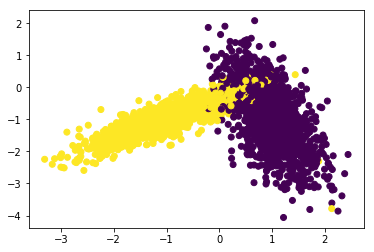

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
# Generate n random value between a and b
def get_n_unique_random_value(a,b,n):
    return random.sample(range(a,b),n)

In [4]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score

def RandomSearchCV(x_train,y_train,classifier, neighbors, folds):
    trainscores = []
    testscores  = []
#     Storing folds+1 equidistant index for train data 
    folds_value = [int(i) for i in np.linspace(0,len(x_train)-1,folds+1)]
    group = []
#     Storing indexes of train data
    indices = [i for i in range(0,folds)]
#     Storing combinations of groups index of train data 
    group_idx = list(combinations(indices, folds-1))
#     Storing index of train data for each group on which training needs to be done
    for i in range(0, folds):
        if i==0:
            idx = list(range(folds_value[i],folds_value[i+1]+1))
        else:
            idx = list(range(folds_value[i]+1,folds_value[i+1]+1))
        group.append(idx)
    for k in tqdm(neighbors):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0, folds):
            train_idx = []
            for i in group_idx[j]:
                [train_idx.append(value) for value in group[i]]
            test_idx = list(set(indices)-set(group_idx[j]))

            X_train = x_train[train_idx]
            Y_train = y_train[train_idx]

            X_test = x_train[group[test_idx[0]]]
            Y_test = y_train[group[test_idx[0]]]

#                 print(X_train.shape)
#                 print(Y_train.shape)
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


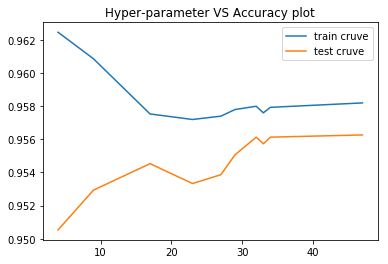

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params = {'n_neighbors':[1,50]}
neighbors = get_n_unique_random_value(params['n_neighbors'][0],params['n_neighbors'][1],10)
neighbors.sort()
folds = 3

trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, neighbors, folds)
# RandomSearchCV(X_train, y_train, neigh, params, folds)

plt.plot(neighbors,trainscores, label='train cruve')
plt.plot(neighbors,testscores, label='test cruve')
plt.title('Hyper-parameter VS Accuracy plot')
plt.legend()
plt.show()

In [6]:
# len(trainscores)
# print(trainscores)
# print(testscores)
# neighbors.sort()
# print(neighbors)